In [35]:
# import necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df_power =  pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv',low_memory=False,
                       infer_datetime_format=True, parse_dates=["FullDate"],index_col=["FullDate"])
df_power.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [37]:
# NUMBER OF ROWS AND COLUMNS
df_power.shape

(92016, 4)

In [38]:
# FIND THE MISSING DATA
df_power.isna().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [39]:
df_power.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [40]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [41]:
#down sample of daily data points
df_power_daily = df_power.resample('D').sum()
df_power_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


Text(0, 0.5, 'G_A_P')

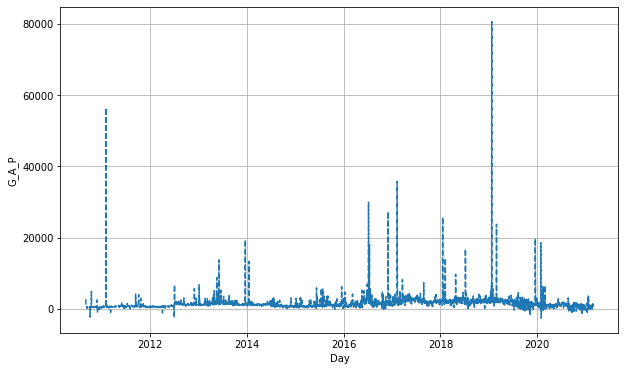

In [42]:
#ploting daily global_active_power over time
plt.figure(figsize=(10,6))
plt.plot(df_power_daily.index, df_power_daily.ElecPrice, '--')
plt.grid()
plt.xlabel('Day')
plt.ylabel('G_A_P')

In [43]:
# index reset
df_power_daily = df_power_daily.reset_index()
df_power_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [76]:
from statsmodels.tsa.stattools import adfuller
GasPrice_CV = adfuller(df_power_daily['GasPrice'])
print('Critical Values:')
for k, v in GasPrice_CV[4].items():
 print(f'{k} : {v}')

Critical Values:
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


In [78]:
ElecPrice_CV = adfuller(df_power_daily['ElecPrice'])
print('Critical Values:')
for k, v in ElecPrice_CV[4].items():
 print(f'{k} : {v}')

Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


In [44]:
# columns selection for predictive model
df_model_data = df_power_daily[['FullDate', 'ElecPrice']]

# columns rename to 'ds' and 'y' respectively
df_model_data = df_model_data.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

df_model_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [45]:
# assigning training and testing data
train = df_model_data[:2757]
test = df_model_data[2757:]
print('train shape', train.shape)
print('test shape', test.shape)

train shape (2757, 2)
test shape (1077, 2)


In [ ]:
#pip install pystan
#pip install fbprophet

In [47]:
# train data fit to Fbprophet model
from fbprophet import Prophet
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
# Next 365 days prediction
# future = model.make_future_dataframe(periods=365, freq='D') 
forecast = model.predict(test) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,69.823117,5044.467671,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,228.957516,5103.976523,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,380.685023,5065.018639,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,160.102083,5131.577871,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,17.693753,4793.463120,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [49]:
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2536.337494,69.823117,5044.467671,2691.764386,2691.764386,2691.764386
1,2018-03-21,2689.655459,228.957516,5103.976523,2692.580955,2692.580955,2692.580955
2,2018-03-22,2788.705741,380.685023,5065.018639,2693.397524,2693.397524,2693.397524
3,2018-03-23,2580.977221,160.102083,5131.577871,2694.214093,2694.214093,2694.214093
4,2018-03-24,2256.367941,17.693753,4793.463120,2695.030663,2695.030663,2695.030663
...,...,...,...,...,...,...,...
1072,2021-02-24,3475.863766,468.272154,6351.640458,3567.126543,1823.348721,5248.508105
1073,2021-02-25,3542.743730,451.581032,6425.148713,3567.943112,1820.195712,5251.142095
1074,2021-02-26,3309.660718,429.531017,6175.149999,3568.759681,1817.042702,5253.557369
1075,2021-02-27,2966.465610,48.850296,5878.822988,3569.576250,1813.889692,5255.971901


In [56]:

mape = np.mean(np.abs(np.array(test['y']) - np.array(forecast.yhat))/ np.array(test['y'])) *100

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(np.array(test['y']),np.array(forecast['yhat'])))
 
print('mean_absolute_percentage_error', round(mape,2))
print('root mean_squared_error', round(rmse,2))

mean_absolute_percentage_error -134.17
root mean_squared_error 3218.16


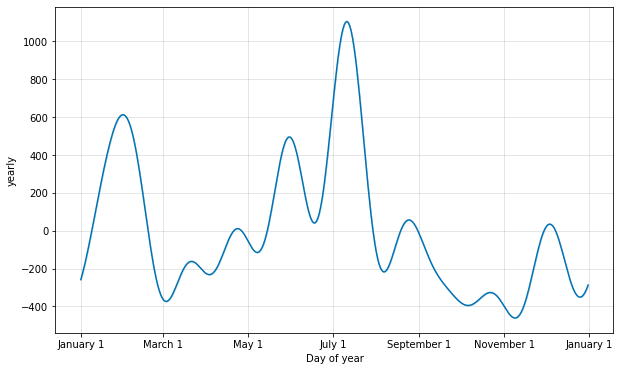

In [57]:
from fbprophet.plot import plot_yearly
plot_yearly(model)

July has the high value

In [59]:
multi_model = df_power_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y',
                                           'SysLoad':'add1','Tmax':'add2',
                                           'GasPrice':'add3'})
multi_model.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [60]:
# assign train and test data
train2 = multi_model[:2757]
test2 = multi_model[2757:]
print('train shape', train2.shape)
print('test shape', test2.shape)

train shape (2757, 5)
test shape (1077, 5)


In [61]:
#create multivariate model
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [62]:
model2.fit(train2)
 
forecast2 = model2.predict(test2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1866.664112,-464.490609,3981.680112,1866.664112,1866.664112,-856.577763,-856.577763,-856.577763,0.237860,...,-84.512848,-84.512848,-84.512848,-39.104444,-39.104444,-39.104444,0.0,0.0,0.0,1985.365644
1,2018-03-21,1867.349885,-250.627045,4370.294819,1867.349885,1867.349885,-1026.630461,-1026.630461,-1026.630461,0.235038,...,42.515562,42.515562,42.515562,-29.837843,-29.837843,-29.837843,0.0,0.0,0.0,1976.703318
2,2018-03-22,1868.035658,688.967008,5254.712927,1868.035658,1868.035658,-215.009060,-215.009060,-215.009060,0.221364,...,145.604343,145.604343,145.604343,-24.826777,-24.826777,-24.826777,0.0,0.0,0.0,2897.096666
3,2018-03-23,1868.721432,458.389951,4751.634081,1868.721432,1868.721432,-274.961329,-274.961329,-274.961329,0.213332,...,-44.332801,-44.332801,-44.332801,-23.929622,-23.929622,-23.929622,0.0,0.0,0.0,2581.305545
4,2018-03-24,1869.407205,-780.853161,3564.205115,1869.407205,1869.407205,-1076.687360,-1076.687360,-1076.687360,0.211379,...,-117.513591,-117.513591,-117.513591,-26.895380,-26.895380,-26.895380,0.0,0.0,0.0,1434.385996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,2601.813038,-1398.200016,3394.422791,1834.019569,3403.948650,-1372.659217,-1372.659217,-1372.659217,0.238077,...,42.515562,42.515562,42.515562,-433.640690,-433.640690,-433.640690,0.0,0.0,0.0,953.579564
1073,2021-02-25,2602.498811,-927.137315,3856.023697,1834.175432,3406.162129,-1033.288529,-1033.288529,-1033.288529,0.239814,...,145.604343,145.604343,145.604343,-460.064407,-460.064407,-460.064407,0.0,0.0,0.0,1313.293701
1074,2021-02-26,2603.184585,-986.678479,3601.894404,1834.331295,3408.375608,-754.725135,-754.725135,-754.725135,0.237209,...,-44.332801,-44.332801,-44.332801,-480.717736,-480.717736,-480.717736,0.0,0.0,0.0,1377.207811
1075,2021-02-27,2603.870358,-1222.864280,3471.999358,1834.487158,3410.589086,-1011.251585,-1011.251585,-1011.251585,0.235689,...,-117.513591,-117.513591,-117.513591,-495.363274,-495.363274,-495.363274,0.0,0.0,0.0,1032.064004


In [64]:
 
#calculating mean absolute percentage error
mape2 = np.mean(np.abs(np.array(test2['y']) -np.array(forecast2['yhat']))/ np.array(test2['y'])) *100
round(mape2,2)

-63.2

In [65]:
 
#calculate rmse
rmse2 = np.sqrt(mean_squared_error(np.array(test2['y']),np.array(forecast2['yhat'])))
round(rmse2,2)

2706.92

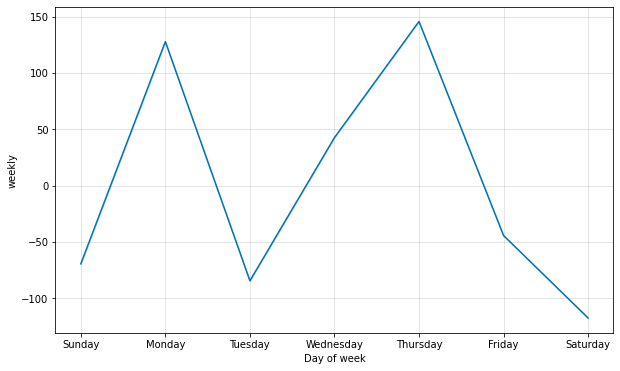

In [66]:
 
# visualize each components (trends, monthly)
from fbprophet.plot import plot_weekly
plot_weekly(model2)

Thursday has the high value